In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Matplotlib created a temporary cache directory at C:\Users\Hp\AppData\Local\Temp\matplotlib-babi8frb because the default path (C:\Users\Hp\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def f(x,y):
    return 2*(x**2) + x*y + 1.5*(y**2) - x - 2*y

In [3]:
def df_dx(x,y) :
    return 4*(x) + y - 1

def df_dy(x,y) :
    return x + 3*y - 2

In [4]:
def L2Norm(x,y) :
    grad_x = df_dx(x,y);
    grad_y = df_dy(x,y);
    return np.sqrt(grad_x**2 + grad_y**2)


In [5]:
def nagd(x_start , y_start , alpha_k , beta_k) :

    x = x_start
    y = y_start

    x_prev = x_start
    y_prev = y_start

    count = 0
    norm = L2Norm(x,y)
    TLevel = 10**(-8)

    f_values = []

    while(norm > TLevel) :
        grad_x = df_dx(x,y)
        grad_y = df_dy(x,y)

        grad_x_pert = df_dx(x + (beta_k)*(x-x_prev) , y + (beta_k)*(y - y_prev))
        grad_y_pert = df_dy(x + (beta_k)*(x-x_prev) , y + (beta_k)*(y - y_prev))

        x_present = x
        y_present = y

        x = x - alpha_k*grad_x_pert + (beta_k)*(x-x_prev)
        y = y - alpha_k*grad_y_pert + (beta_k)*(y-y_prev)

        f_values.append(f(x, y))
        norm = L2Norm(x,y)
        count = count + 1
        x_prev = x_present
        y_prev = y_present
       

    print(f"Iterations: {count}")
    print(x,y,f(x,y))
    
    return x,y,f(x,y),f_values



In [6]:
def gradient_descent(x_start , y_start , alpha_k) :

    x = x_start
    y = y_start

    count = 0
    norm = L2Norm(x,y)
    TLevel = 10**(-8)

    f_values = []

    while(norm > TLevel) :
        grad_x = df_dx(x,y)
        grad_y = df_dy(x,y)

        x = x - alpha_k*grad_x
        y = y - alpha_k*grad_y


        norm = L2Norm(x,y)
        count = count + 1
       
        f_values.append(f(x, y))

    print(f"Iterations: {count}")
    print(x,y,f(x,y))

    return x,y,f(x,y),f_values
    
   

In [7]:
x_range = np.arange(-150,150,0.1)
y_range = np.arange(-150,150,0.1)

X,Y = np.meshgrid(x_range,y_range)

Z = f(X,Y)

x_start , y_start = 3 , 5
alpha_k = 2.0 / (7.0 + (5**0.5))
mu_not = (7.0 + (5**0.5)) / (7.0 - (5**0.5))
beta_k = ((mu_not**0.5)-1.0) / ((mu_not**0.5)+1.0)

x_nagd ,y_nagd ,f_nagd, f_val_nagd = nagd(x_start , y_start , alpha_k , beta_k)

x_gd ,y_gd ,f_gd, f_val_gd = gradient_descent(x_start , y_start , alpha_k)




Iterations: 18
0.0909090889008485 0.6363636396130409 -0.6818181818181819
Iterations: 28
0.09090908916926936 0.6363636391787267 -0.6818181818181818


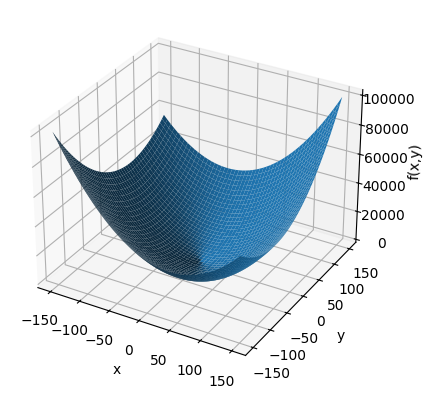

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

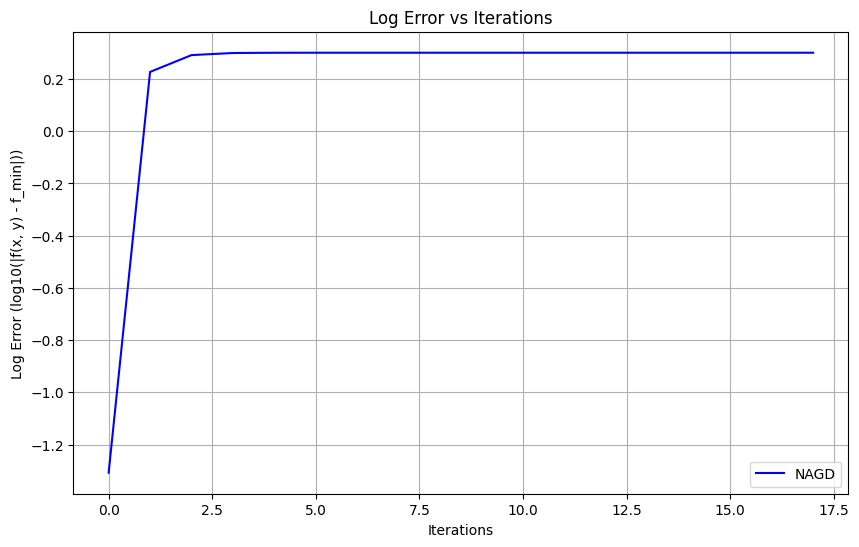

In [9]:

log_errors_nagd = np.log10(np.abs(np.array(f_val_nagd) - 0.6818181818181818 ) / 0.6818181818181818)

plt.figure(figsize=(10, 6))
plt.plot(log_errors_nagd, label="NAGD", color="blue")

plt.xlabel("Iterations")
plt.ylabel("Log Error (log10(|f(x, y) - f_min|))")
plt.title("Log Error vs Iterations")
plt.legend()
plt.grid()
plt.show()